<a href="https://colab.research.google.com/github/restful3/ds4th_study/blob/main/source/LangChain%ED%95%99%EC%8A%B5/4_PromptTemplate%EC%9C%BC%EB%A1%9C_%EA%B0%84%EB%8B%A8%ED%95%9C_%ED%94%84%EB%A1%AC%ED%94%84%ED%8A%B8%EC%9E%85%EB%A0%A5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Prompt란?
- 여러 구성요소를 활용하여 모델에 입력
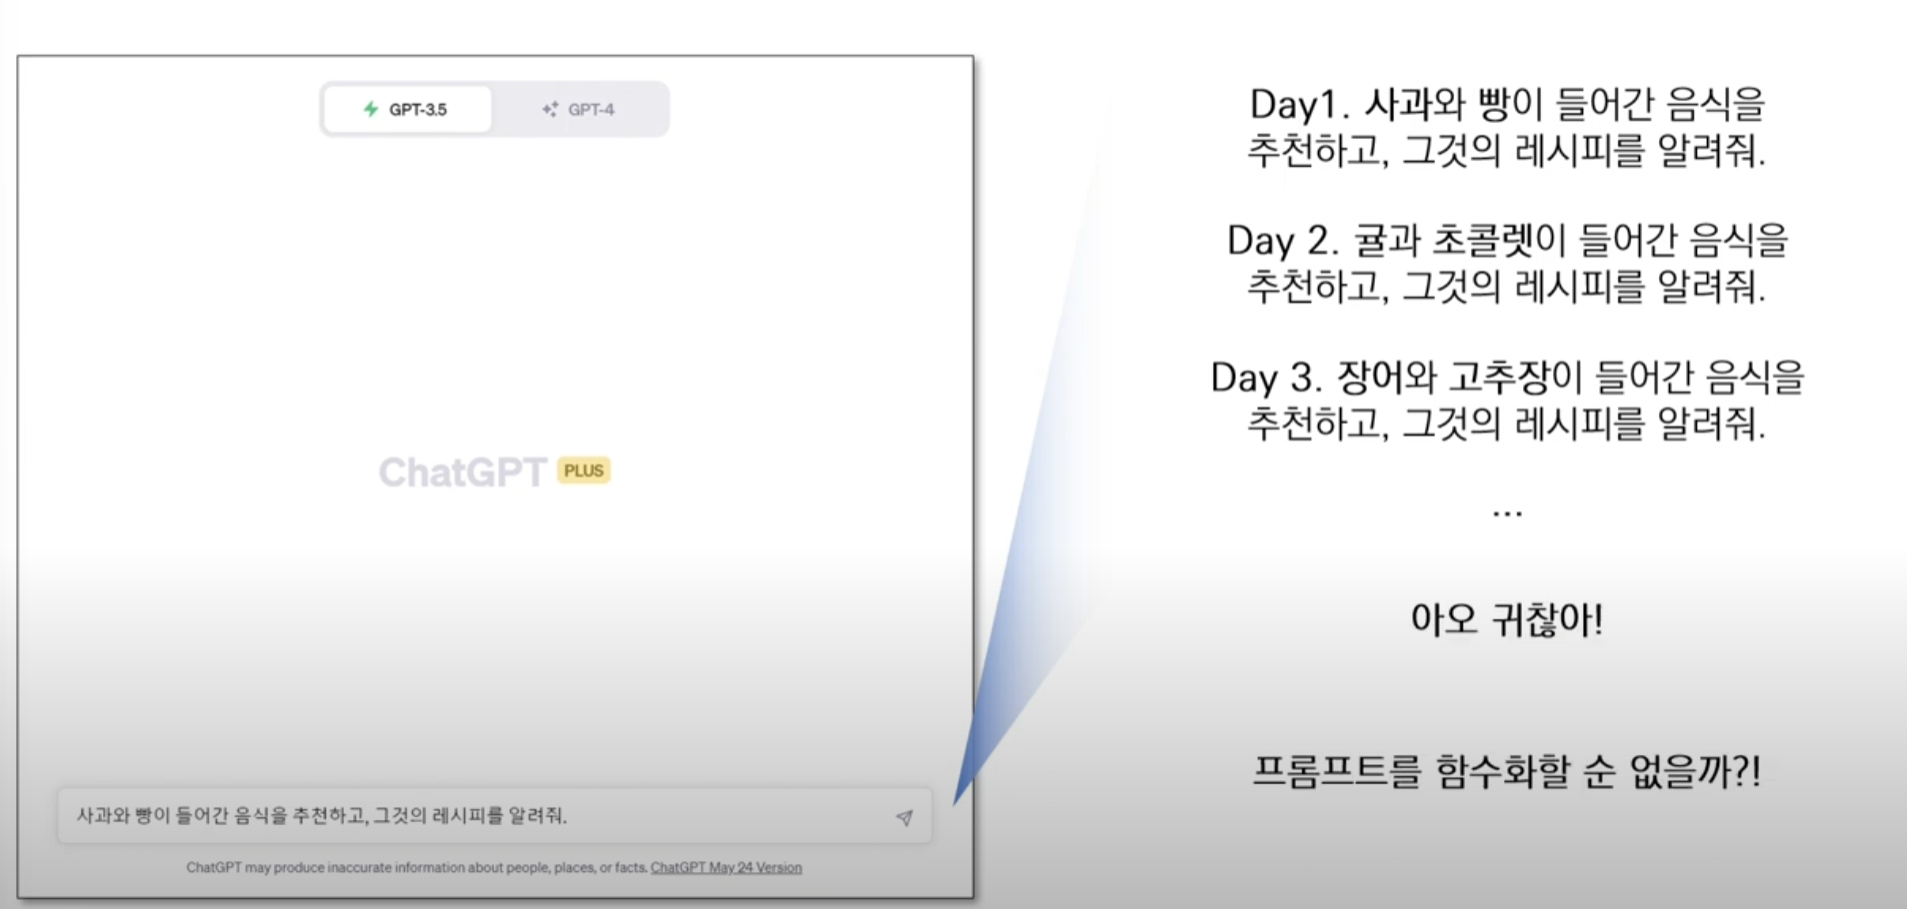

In [ ]:
!pip install langchain
!pip install openai
import os
os.environ['OPENAI_API_KEY']= input('발급받은api키를 입력하세요')

## 프롬프트템플릿 맛보기
1. Prompt Template
- 일반적 프롬프트템플릿 생성시
2. Chat Prompt Template
- 채팅LLM에 프롬프트 전달시 특화

In [3]:
from langchain.prompts import PromptTemplate, ChatPromptTemplate

# 프롬프트템플릿을 토앻 매개변수 삽입 가능한 문자열로 변환
string_prompt = PromptTemplate.from_template("tell me a joke about {subject}")

# 매개변수 삽입한 결과를 string_prompt_value에 전달
string_prompt_value = string_prompt.format_prompt(subject = "man")

# 채팅LLM이 아닌 LLM 과 대화할 때 필요한 프롬프트 = string prompt
string_prompt_value

StringPromptValue(text='tell me a joke about man')

In [5]:
# to_string()함수로 생성한 문장을 text로 변환 가능
string_prompt_value.to_string()

'tell me a joke about man'

In [6]:
# 프롬프트템플릿을 토앻 매개변수 삽입 가능한 문자열로 변환
chat_prompt = ChatPromptTemplate.from_template("tell me a joke about {subject}")

# 매개변수 삽입한 결과를 string_prompt_value에 전달
string_prompt_value = chat_prompt.format_prompt(subject = "man")

# 채팅LLM이 아닌 LLM 과 대화할 때 필요한 프롬프트 = string prompt
string_prompt_value

ChatPromptValue(messages=[HumanMessage(content='tell me a joke about man')])

> chat prompt는 human message에 들어가는 것을 확인

In [11]:
from langchain.prompts import PromptTemplate

template = """
너는 요리사야. 내가 가진 재료들을 갖고 만들 수 있는 요리를 추천하고, 그 요리의 레시피를 추천해줘.
내가 가진 재료는 다음과 같아.

<재료>
{재료}
"""
string_prompt = PromptTemplate(
    template=template,
    input_variables=['재료'])

print(string_prompt.format(재료='양파, 계란, 사과, 빵'))


너는 요리사야. 내가 가진 재료들을 갖고 만들 수 있는 요리를 추천하고, 그 요리의 레시피를 추천해줘.
내가 가진 재료는 다음과 같아.

<재료>
양파, 계란, 사과, 빵



In [20]:
from langchain.llms import OpenAI
from langchain.callbacks.streaming_stdout import StreamingStdOutCallbackHandler
chatgpt = OpenAI(model_name='gpt-3.5-turbo-instruct', streaming= True , callbacks = [StreamingStdOutCallbackHandler()],
                 temperature =0.6 ,max_tokens=1000)
chatgpt.predict(
    string_prompt.format(재료='양파, 계란, 사과, 빵')
    )


너가 가진 재료로 만들 수 있는 요리는 계란말이와 사과 치즈 샌드위치야.
계란말이의 레시피는 다음과 같아.
1. 양파를 적당한 크기로 다져준다.
2. 계란을 깨서 볼에 넣고 잘 풀어준다.
3. 양파를 계란에 넣고 섞어준다.
4. 팬에 식용유를 두르고 양파와 계란을 넣어서 노릇하게 익힌다.
5. 접시에 옮겨서 썰어서 내놓는다.

사과 치즈 샌드위치의 레시피는 다음과 같아.
1. 빵을 한 조각씩 꺼내서 반으로 잘라준다.
2. 사과를 적당한 크기로 썰어서 노릇하게 익힌다.
3. 노릇하게 익힌 사과를 빵 위에 올려준다.
4. 치즈를 빵 위에 얹어준다.
5. 다른 반쪽의 빵을 올려서 샌드위치를 만든다.
6. 냉장고에서 1분 정도 보관한 뒤, 먹기 좋은 온도가 되면 썰어서 내놓는다.

즐거운 요리 시간 되세요!

'\n너가 가진 재료로 만들 수 있는 요리는 계란말이와 사과 치즈 샌드위치야.\n계란말이의 레시피는 다음과 같아.\n1. 양파를 적당한 크기로 다져준다.\n2. 계란을 깨서 볼에 넣고 잘 풀어준다.\n3. 양파를 계란에 넣고 섞어준다.\n4. 팬에 식용유를 두르고 양파와 계란을 넣어서 노릇하게 익힌다.\n5. 접시에 옮겨서 썰어서 내놓는다.\n\n사과 치즈 샌드위치의 레시피는 다음과 같아.\n1. 빵을 한 조각씩 꺼내서 반으로 잘라준다.\n2. 사과를 적당한 크기로 썰어서 노릇하게 익힌다.\n3. 노릇하게 익힌 사과를 빵 위에 올려준다.\n4. 치즈를 빵 위에 얹어준다.\n5. 다른 반쪽의 빵을 올려서 샌드위치를 만든다.\n6. 냉장고에서 1분 정도 보관한 뒤, 먹기 좋은 온도가 되면 썰어서 내놓는다.\n\n즐거운 요리 시간 되세요!'

## Few Shot 예제를 통한 프롬프트템플릿
-  Few Shot은 딥러닝 모델이 결과물을 출력할 때, 예시 결과물을 제시함으로써 원하는 결과로 유도하는 것
  - 결과물의 품질향상에 효과적

In [24]:
from langchain.prompts.few_shot import FewShotPromptTemplate
from langchain.prompts.prompt import PromptTemplate

examples = [
    {
     "question":"아이유로 삼행시 만들어줘",
     "answer":
     """
     아 : 아이유는
     이 : 이런 강의를 들을 이
     유 : 유가 없다
     """
    },
    {
       "question":"김구라로 삼행시 만들어줘",
     "answer":
     """
     김 : 김치 좋아한다고 한건 다
     구 : 구라 였던 거였지?
     라 : 라면 먹으면서 김치도 안챙기다니...
     """
    }
]
example_prompt = PromptTemplate(input_variables=["question","answer"],
                                template='Question: {question}\n{answer}')
print(example_prompt.format(**examples[0]))

Question: 아이유로 삼행시 만들어줘

     아 : 아이유는
     이 : 이런 강의를 들을 이
     유 : 유가 없다
     


In [25]:
prompt = FewShotPromptTemplate(
    examples=examples,
    example_prompt=example_prompt,
    suffix = "Question: {input}",
    input_variables=['input']
)
print(prompt.format(input='호날두로 삼행시 만들어줘'))

Question: 아이유로 삼행시 만들어줘

     아 : 아이유는
     이 : 이런 강의를 들을 이
     유 : 유가 없다
     

Question: 김구라로 삼행시 만들어줘

     김 : 김치 좋아한다고 한건 다
     구 : 구라 였던 거였지?
     라 : 라면 먹으면서 김치도 안챙기다니...
     

Question: 호날두로 삼행시 만들어줘


In [26]:
chatgpt.predict('호날두로 삼행시 만들어줘')



오 나의 로호날두
너는 축구의 신이다
공을 다루는 그 손길
세계를 사로잡는다

빠른 발동으로 달려가는
너의 모습은 아름답다
축구를 사랑하는 마음
지구를 행복하게 만든다

축구장은 너의 무대
우리의 마음을 설레게 한다
로호날두, 너는 우리의 영웅
골망을 향해 날아가는 공

우리의 마음을 사로잡는
로호날두의 멋진 드리블
축구는 너의 무기
우리는 너의 팬이다

로호날두, 너는 우리의 자랑
세계를 빛나게 하는 슈팅스타
축구는 우리의 문화
로호날두, 너는 축구의 신이다.

'\n\n오 나의 로호날두\n너는 축구의 신이다\n공을 다루는 그 손길\n세계를 사로잡는다\n\n빠른 발동으로 달려가는\n너의 모습은 아름답다\n축구를 사랑하는 마음\n지구를 행복하게 만든다\n\n축구장은 너의 무대\n우리의 마음을 설레게 한다\n로호날두, 너는 우리의 영웅\n골망을 향해 날아가는 공\n\n우리의 마음을 사로잡는\n로호날두의 멋진 드리블\n축구는 너의 무기\n우리는 너의 팬이다\n\n로호날두, 너는 우리의 자랑\n세계를 빛나게 하는 슈팅스타\n축구는 우리의 문화\n로호날두, 너는 축구의 신이다.'

In [27]:
chatgpt.predict(
    prompt.format(input='호날두로 삼행시 만들어줘')
    )



     호 : 호날두는
     날 : 날마다 골을 넣는다
     두 : 두려움 없이 말이다

'\n\n     호 : 호날두는\n     날 : 날마다 골을 넣는다\n     두 : 두려움 없이 말이다'

## Example Selector를 이용한 동적 Few-shot러닝
- 반대의 느낌, 유사한 느낌을 유추하는 경우 동적으로 변경하는 데이터셋이 필요
- 예제를 동적으로 입력하고 싶은 경우 Example Selector를 활용할 수 있음
- 여러 작업을 수행하도록 만들되 내가 원하는 범위의 대답을 출력하도록 하려면 사용자의 입력에 동적으로 반응해야 함. 이와 동시에 예제를 모두 학습하는 것이 아니라 적절한 예시만 포함하도록 함으로써 입력 Prompt의 길이를 제한 하고 이를 통해 오류가 밣생하지 않도록 조절할 수 있음


In [31]:
from langchain.prompts.example_selector import SemanticSimilarityExampleSelector
# 사용자가 입력한 것과 유사한 것 가져옴
from langchain.vectorstores import Chroma
# embeding db를 만들어줌
from langchain.embeddings import OpenAIEmbeddings
from langchain.prompts import FewShotPromptTemplate, PromptTemplate

example_prompt = PromptTemplate(
    input_variables=["input","output"],
    template="Input: {input} \n Ouput: {output}"
)

# 반의어 셋 생성
examples = [
    {"input":"행복","output":"슬픔"},
    {"input":"흥미","output":"지루"},
    {"input":"불안","output":"안정"},
    {"input":"긴기차","output":"짧은기차"},
    {"input":"큰공","output":"작은공"}
            ]

example_selector = SemanticSimilarityExampleSelector.from_examples(
    # 예제데이터셋
    examples,
    # 벡터수치화
    OpenAIEmbeddings(),
    # 벡터화된db저장
    Chroma,
    # 예시출력 수
    k=1
)

In [ ]:
!pip install chromadb
!pip install tiktoken

In [34]:
similar_prompt = FewShotPromptTemplate(
    example_selector=example_selector,
    example_prompt=example_prompt,
    prefix="주어진 입력에 대해 반대의 의미를 가진 단어를 출력해줘",
    suffix="input: {단어}\nOutput:",
    input_variables=['단어'],
)

print(similar_prompt.format(단어="무서운"))

주어진 입력에 대해 반대의 의미를 가진 단어를 출력해줘

Input: 불안 
 Ouput: 안정

input: 무서운
Output:


In [35]:
print(similar_prompt.format(단어="큰 고양이"))


주어진 입력에 대해 반대의 의미를 가진 단어를 출력해줘

Input: 큰공 
 Ouput: 작은공

input: 큰 고양이
Output:


In [36]:
print(chatgpt(
    similar_prompt.format(단어="큰 고양이")
))

 작은 고양이 작은 고양이


## Output Parser를 활용한 출력값 고정
- json, dict 등 원하는 형태로 답변을 고정하려면 Output Parser 사용

In [37]:
from langchain.output_parsers import CommaSeparatedListOutputParser
from langchain.prompts import PromptTemplate, ChatPromptTemplate, HumanMessagePromptTemplate
from langchain.llms import OpenAI
from langchain.chat_models import ChatOpenAI

output_parser = CommaSeparatedListOutputParser()
format_instructions = output_parser.get_format_instructions()
format_instructions

'Your response should be a list of comma separated values, eg: `foo, bar, baz`'

In [43]:
prompt = PromptTemplate(
    template="{주제} 5개를 추천해줘. \n{format_instructions}",
    input_variables=['주제'],
    partial_variables={'format_instructions': format_instructions}
)

In [44]:
model = OpenAI(temperature=0)

In [45]:
_input = prompt.format(주제='영화')
output = model(_input)

In [46]:
print(output_parser.parse(output))

['1. Parasite\n2. The Shawshank Redemption\n3. Inception\n4. The Godfather\n5. Forrest Gump']
